In [21]:
from generate import generate_cell_data, generate_gene_data
# Example usage:
ncells = 100
ngenes = 10
nclusters = 3
ref_cols = ["blue", "brown", "gold"]
prop = [0.65, 0.3, 0.05]
xmus = [3, 5, 2]
xsds = [0.5, 0.5, 0.5]
ymus = [5, 1, 2]
ysds = [0.5, 0.5, 0.5]

samples_cell, clust_cell = generate_cell_data(ncells=ncells, ngenes=ngenes, ncategories=nclusters, 
                                              xmus=xmus, xsds=xsds, ymus=ymus, 
                                              ysds=ysds, prop=prop, ref_cols=ref_cols)


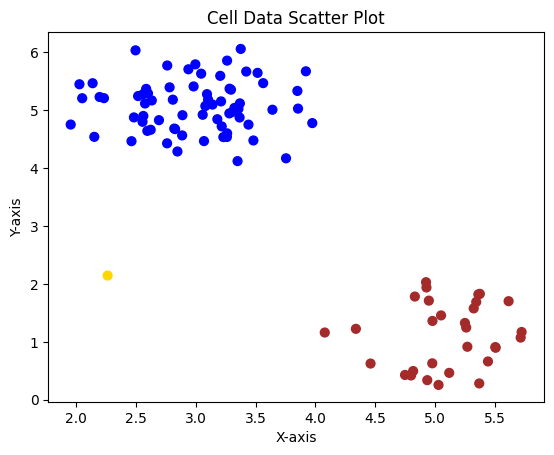

In [23]:
import matplotlib.pyplot as plt

plt.scatter(samples_cell[:, 0], samples_cell[:, 1], marker='o', s=40, c=clust_cell)
plt.title("Cell Data Scatter Plot")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.show()

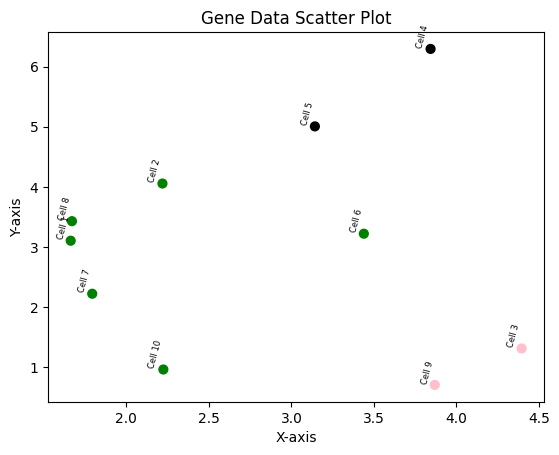

In [24]:
ref_cols_gene = ['black', 'pink', 'green']

prop = [0.34, 0.33, 0.33]
xsds = [0.9, 0.9, 0.9]
ysds = [0.9, 0.9, 0.9]

row_names = [f"Cell {i+1}" for i in range(ncells)]
col_names = [f"Gene {i+1}" for i in range(ngenes)]

samples_gene, clust_gene = generate_gene_data(ncells=ncells, ngenes=ngenes, ncategories=ncategories, 
                                              xmus=xmus, xsds=xsds, ymus=ymus, 
                                              ysds=ysds, prop=prop, ref_cols=ref_cols_gene)


plt.scatter(samples_gene[:, 0], samples_gene[:, 1], marker='o', s=40, c=clust_gene)
plt.title("Gene Data Scatter Plot")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")

# Adding annotations (cell names) to the plot
for i in range(ngenes):
    plt.text(samples_gene[i, 0], samples_gene[i, 1], row_names[i], fontsize=6, ha='right', va='bottom', rotation=75)

plt.show()


In [25]:
import numpy as np
X = np.dot(samples_cell, samples_gene.T)

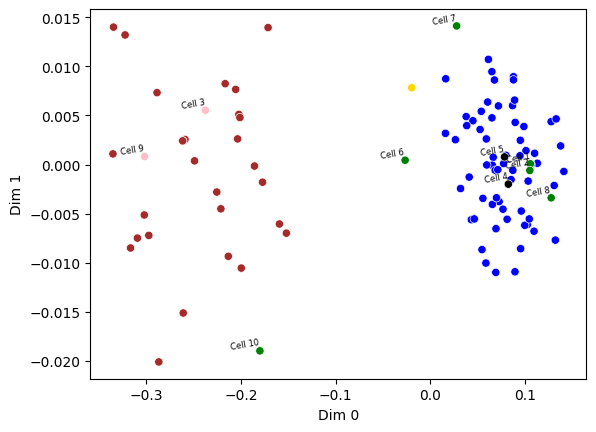

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from ca import CA


transfer = CA()


transfer.fit(contingency_table=X)

pcs_row, pcs_col = \
    transfer.get_princpl_coords_df(row_categories=row_names,
                                   col_categories=col_names)
pcs_row['Dim 1'] = pcs_row['Dim 1']
pcs_col['Dim 1'] = pcs_col['Dim 1']

variances = transfer.principal_inertias_
percent_explnd_var = (variances / variances.sum()) * 100

fig, ax = plt.subplots()
sns.scatterplot(x='Dim 0', y='Dim 1', data=pcs_row, color = clust_cell, ax=ax)
sns.scatterplot(x='Dim 0', y='Dim 1', data=pcs_col, color = clust_gene, ax=ax)
#for i, txt in enumerate(list(row_names)):
#    ax.annotate(txt, (pcs_row.iloc[i]['Dim 0'], pcs_row.iloc[i]['Dim 1']))
for i in range(ngenes):
    plt.text(pcs_col.iloc[i]['Dim 0'], pcs_col.iloc[i]['Dim 1'], row_names[i], fontsize=6, ha='right', va='bottom', rotation=10)


ax.set_xlabel('Dim 0')
ax.set_ylabel('Dim 1')
plt.show()



Text(0, 0.5, 'Y-axis')

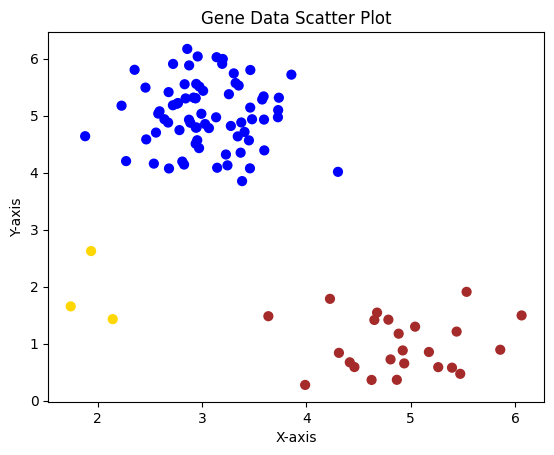

In [30]:
from generate import generate_cell_data, generate_gene_data
# Example usage:
ncells = 100
ngenes = 10
nclusters = 3
ref_cols = ["blue", "brown", "gold"]
prop = [0.65, 0.3, 0.05]
xmus = [3, 5, 2]
xsds = [0.5, 0.5, 0.5]
ymus = [5, 1, 2]
ysds = [0.5, 0.5, 0.5]

samples_cell_2, clust_cell_2 = generate_cell_data(ncells=ncells, ngenes=ngenes, ncategories=nclusters, 
                                              xmus=xmus, xsds=xsds, ymus=ymus, 
                                              ysds=ysds, prop=prop, ref_cols=ref_cols)

plt.scatter(samples_cell_2[:, 0], samples_cell_2[:, 1], marker='o', s=40, c=clust_cell_2)
plt.title("Gene Data Scatter Plot")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")


In [31]:
import numpy as np
X2 = np.dot(samples_cell_2, samples_gene.T)

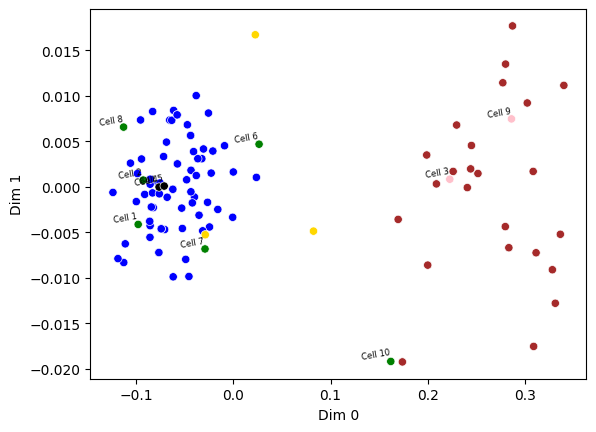

In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from ca import CA


transfer = CA()

transfer.fit(contingency_table=X2)

pcs_row, pcs_col = \
    transfer.get_princpl_coords_df(row_categories=row_names,
                                   col_categories=col_names)
pcs_row['Dim 1'] = pcs_row['Dim 1']
pcs_col['Dim 1'] = pcs_col['Dim 1']

variances = transfer.principal_inertias_
percent_explnd_var = (variances / variances.sum()) * 100

fig, ax = plt.subplots()
sns.scatterplot(x='Dim 0', y='Dim 1', data=pcs_row, color = clust_cell_2, ax=ax)
sns.scatterplot(x='Dim 0', y='Dim 1', data=pcs_col, color = clust_gene, ax=ax)
#for i, txt in enumerate(list(row_names)):
#    ax.annotate(txt, (pcs_row.iloc[i]['Dim 0'], pcs_row.iloc[i]['Dim 1']))
for i in range(ngenes):
    plt.text(pcs_col.iloc[i]['Dim 0'], pcs_col.iloc[i]['Dim 1'], row_names[i], fontsize=6, ha='right', va='bottom', rotation=10)


ax.set_xlabel('Dim 0')
ax.set_ylabel('Dim 1')
plt.show()

